In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#Author: Willard Ford
#Version: Sep 11, 2022

In [2]:
# Part 1
"""
Method returns a dataframe given a gct file.

If summary is True, prints out the number of columns and rows. summary defaults to False.
"""
def df_gct(file, summary = False):
    # Tab separated file
    dataFrame = pd.read_csv(file, sep = "\t", skiprows = 2)
    # Optional parameter that prints the shape of our data.
    if summary:
        shape = dataFrame.shape
        print(f"Number of Rows: {shape[0]} \nNumber of Columns: {shape[1]}")
    return dataFrame


In [3]:
# Part 2
# A:
# This object doesn't change. The first call prints the number of Rows and Columns.
BRCA_minimal = df_gct("https://datasets.genepattern.org/data/test_data/BRCA_minimal_60x19.gct", True)
# B:
BRCA_minimal = df_gct("https://datasets.genepattern.org/data/test_data/BRCA_minimal_60x19.gct")

Number of Rows: 60 
Number of Columns: 21


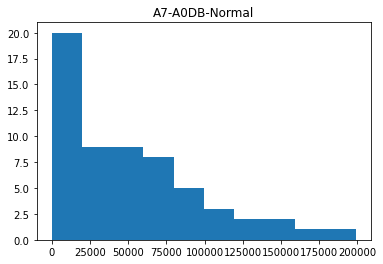

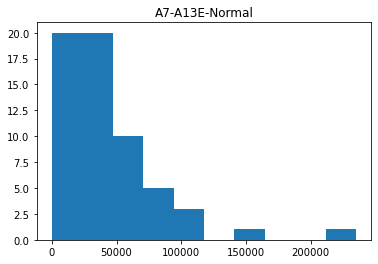

KeyError: 'BH-A0B3-primary'

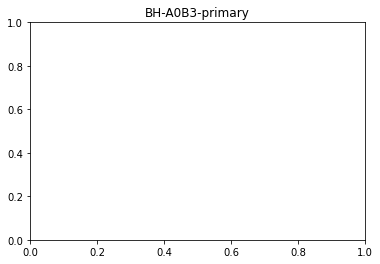

In [4]:
# Part 3

# This line shows that there are no columns named: "BH-A0B3-primary" or "BH-A0B5-primary"
#print(BRCA_minimal.columns)

# If the columns did exist this would print them all by creating a list of pertinent columns than iterating over them.
columns = ["A7-A0DB-Normal","A7-A13E-Normal","BH-A0B3-primary","BH-A0B5-primary"]

for column in columns:
    # Add title by plot
    plt.title(column)
    plt.hist(BRCA_minimal[column])
    plt.show()

In [5]:
# Part 4

data = []
# Populate data with statistics

# Cut first two non-numeric columns
columns = BRCA_minimal.columns[2:]
for column in columns:
    data.append((column, 
             BRCA_minimal[column].mean(), 
             BRCA_minimal[column].median(),
             BRCA_minimal[column].std()))
# Create and print out dataframe
df = pd.DataFrame(data, columns = ['Sample name','Mean','Median','Standard Deviation'])
print(df)

       Sample name          Mean       Median  Standard Deviation
0   A7-A0CE-Normal  28266.254337  13988.73015        36685.976057
1   A7-A0CH-Normal  37951.066482  26623.60135        31607.953950
2   A7-A0D9-Normal  52091.028092  40357.17920        51461.917259
3   A7-A0DB-Normal  51278.083847  41211.34020        47992.835378
4   A7-A13E-Normal  43001.924110  39598.80120        39591.881631
5   A7-A13F-Normal  37183.546548  30000.44905        30910.293194
6   A7-A13G-Normal  59433.558282  37586.62055        79757.461363
7   AC-A23H-Normal  35281.889132  19706.05600        41797.826463
8   AC-A2FB-Normal  35974.838768  21019.07380        36032.001438
9   AC-A2FF-Normal  28014.183067  14858.58480        33231.900729
10   3C-AAAU-Tumor  19410.475793   8181.79375        26878.830853
11   3C-AALI-Tumor  28798.771522   7618.27080        42747.107199
12   3C-AALJ-Tumor  24617.674375   7940.16320        35941.823408
13   3C-AALK-Tumor  40568.659982  17470.41790        71766.481729
14   4H-AA

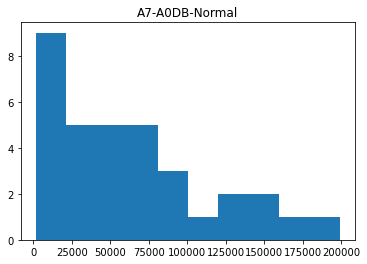

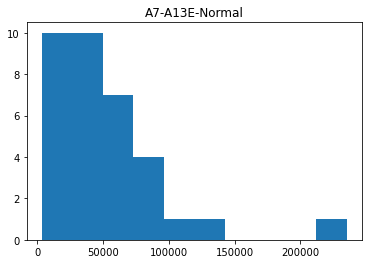

       Sample name          Mean       Median
0   A7-A0CE-Normal  41398.244812  32193.49205
1   A7-A0CH-Normal  46750.038891  38440.99670
2   A7-A0D9-Normal  59142.744700  40357.17920
3   A7-A0DB-Normal  62854.093538  48822.42270
4   A7-A13E-Normal  51955.288856  42696.71145
5   A7-A13F-Normal  44892.169629  35916.03055
6   A7-A13G-Normal  59350.131082  42112.44405
7   AC-A23H-Normal  49522.476697  46433.13355
8   AC-A2FB-Normal  46365.967279  38334.48845
9   AC-A2FF-Normal  40882.737921  32733.54255
10   3C-AAAU-Tumor  24014.274650  19340.70215
11   3C-AALI-Tumor  36867.655050  23187.05820
12   3C-AALJ-Tumor  38117.152150  24309.35630
13   3C-AALK-Tumor  65652.102147  28879.18905
14   4H-AAAK-Tumor  71599.092741  33891.27660
15   5L-AAT0-Tumor  51527.058641  39106.61385
16   5L-AAT1-Tumor  54505.819071  27003.97720
17   5T-A9QA-Tumor  21442.543229  12760.98330
18   A1-A0SD-Tumor  36136.462126  23104.95410


In [11]:
# Part 5
# A
# Iterate through every column is equivilant to filtering through every row, dropping values less than 500.
data_filtered = BRCA_minimal
for column in columns:
    data_filtered = data_filtered[data_filtered[column]>=500]
# B
# Record new means and medians in data
data = []
# Columns to print, again BH starting columns don't exist in our dataset.
q3columns = ["A7-A0DB-Normal","A7-A13E-Normal","BH-A0B3-primary","BH-A0B5-primary"]
for column in columns:
    # Histogram method copied from q3. Placed here so we only have to iterate once.
    if column in q3columns:
        # Histograms from q3 with new filtered data.
        plt.title(column)
        plt.hist(data_filtered[column])
        plt.show()
    data.append((column, 
             data_filtered[column].mean(), 
             data_filtered[column].median()))
# Turn data into DataFrame with column names and print
dataframe = pd.DataFrame(data, columns = ['Sample name','Mean','Median'])
print(dataframe)
